## Instructor Demo: Simulation of Stock Price Trajectory

This program executes a single simulation of stock price trajectory over the next `252` trading days (or year of trading) for `AAPL` stock, based on a normal probability distribution of historical average daily returns derived from the sample mean and standard deviation.

In [9]:
# Import libraries and dependencies
import os
import numpy as np
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

import os
import requests
import pandas as pd
import pandas_datareader as pdr

from pandas_datareader import data as wb
import seaborn as sns

from dotenv import load_dotenv
import numpy as np
%matplotlib inline
import json
#from forex_python.converter import CurrencyRates
import datetime as dt
from countryinfo import CountryInfo

#import plotly.express as px
from pathlib import Path
#Interactive Plot 
#import plotly.offline as pyo
#Candlestick Chart
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots

#pyo.init_notebook_mode(connected=True)
#pd.options.plotting.backend = 'plotly'

import pandas_montecarlo

In [16]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_KEY_ID")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)





# Load .env enviroment variables
load_dotenv()

# Set Alpha Vantage API key 
alpha_vantage_api_key = os.getenv("ALPHA_VANTAGE_API")

# Verify that Alpha Vantage key was correctly loaded
print(f"Alpha Vantage Key type: {type(alpha_vantage_api_key)}")

Alpha Vantage Key type: <class 'str'>


### Get 4 Years Worth of Data via API Call and Read in as DataFrame 

In [23]:
# Set the ticker
ticker = "AAPL"

# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes of 4 years from Today
start_date = pd.Timestamp("2017-05-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-04", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for AAPL
ticker_data = api.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

ticker_data.head()




time_series = pdr.av.time_series.AVTimeSeriesReader('eurusd', api_key='alpha_vantage_api_key')
forex = time_series.read()
forex.index = pd.to_datetime(forex.index, format='%Y-%m-%d')
forex

,open,high,low,close,volume
2003-02-24,1.0731,1.0805,1.0705,1.0790,0
2003-02-25,1.0790,1.0821,1.0740,1.0765,0
2003-02-26,1.0764,1.0811,1.0726,1.0789,0
2003-02-27,1.0788,1.0837,1.0733,1.0767,0
2003-02-28,1.0765,1.0807,1.0729,1.0801,0
...,...,...,...,...,...
2022-04-18,1.0807,1.0822,1.0768,1.0778,0
2022-04-19,1.0776,1.0815,1.0760,1.0788,0
2022-04-20,1.0789,1.0867,1.0782,1.0851,0
2022-04-21,1.0850,1.0936,1.0822,1.0835,0


In [20]:
# Reorganize the DataFrame
ticker_data = pd.concat([ticker_data], axis=1, keys=["AAPL"])

# Display sample data
ticker_data.head()








ticker_data = pd.concat([forex], axis=1, keys=["eurusd"])
ticker_data.head()

eurusd                               
              open    high     low   close volume
2003-02-24  1.0731  1.0805  1.0705  1.0790      0
2003-02-25  1.0790  1.0821  1.0740  1.0765      0
2003-02-26  1.0764  1.0811  1.0726  1.0789      0
2003-02-27  1.0788  1.0837  1.0733  1.0767      0
2003-02-28  1.0765  1.0807  1.0729  1.0801      0

### Run the Monte Carlo Simulation

In [21]:
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast one year daily returns
MC_AAPL = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = num_sims,
    num_trading_days = 252
)

In [22]:
# Run Monte Carlo simulations to forecast one year daily returns
MC_AAPL.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.


C:\Users\scott\OneDrive\Scott\FinTechBC\InClassWork\ASU-VIRT-FIN-PT-03-2022-U-LOL\08-Project-1\Project_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001965,0.997891,1.000819,1.005676,0.996807,0.997284,0.999681,1.000056,1.000762,1.004412,...,1.003888,0.992550,0.996324,0.994641,1.004294,1.012274,0.994985,0.994045,0.999782,0.986980
2,0.996810,0.997300,0.989348,1.002437,1.004468,0.980188,1.003934,0.999680,0.995601,1.012036,...,1.006671,0.992065,1.004480,1.002416,1.005119,1.015100,0.994150,0.994760,1.000839,0.992273
3,0.996823,0.996920,1.003958,0.999133,0.994543,0.983990,0.998997,1.002089,0.996140,1.016533,...,1.012225,0.982439,1.010434,0.996265,1.000570,1.004833,1.000682,1.007313,0.996550,0.991591
4,1.001785,0.992893,1.008295,0.997279,0.982186,0.983317,0.988619,0.997834,0.992232,1.009112,...,1.010582,0.986076,1.007551,0.996446,0.998109,1.010503,0.999862,1.015387,0.997888,0.988531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.005951,0.859281,1.057928,0.937066,0.980277,0.980495,0.836603,0.990255,0.997026,1.117497,...,0.943002,1.005812,1.130754,0.982280,0.994943,1.234707,0.937043,0.865540,0.901267,1.070388
249,1.010584,0.864557,1.057085,0.943364,0.972198,0.984192,0.835106,0.986698,0.996853,1.126900,...,0.948342,1.004051,1.130426,0.992312,0.988088,1.229863,0.938920,0.873834,0.906944,1.073332
250,1.025600,0.858232,1.053831,0.936154,0.969762,0.986344,0.836485,0.988644,1.000037,1.125712,...,0.946942,1.009874,1.135018,0.983347,0.983226,1.228120,0.946604,0.866913,0.915768,1.068292
251,1.020490,0.857300,1.056206,0.932133,0.967850,0.982261,0.832551,0.997371,1.002289,1.126832,...,0.947871,1.017393,1.143263,0.994303,0.987209,1.224366,0.943370,0.868042,0.911320,1.064586


### Plot the Simulated Outcomes for the Next Year (252 Traiding Days)

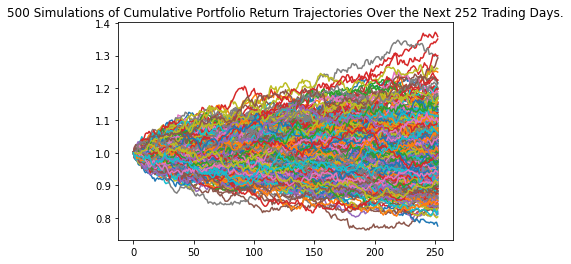

In [24]:
# Plot simulation outcomes
line_plot = MC_AAPL.plot_simulation()

### Plot the Simulated Daily Returns Trajectory for `AAPL` over the Next Year (252 Trading Days)

In [25]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_AAPL.simulated_return.mean(axis=1)),
    "median": list(MC_AAPL.simulated_return.median(axis=1)),
    "min": list(MC_AAPL.simulated_return.min(axis=1)),
    "max": list(MC_AAPL.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,0.999787,0.999688,0.981821,1.019429
2,0.999700,0.999220,0.976937,1.025458
3,0.999880,0.999366,0.975054,1.026299
4,0.999609,0.999847,0.965023,1.034535


<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of AAPL Stock Over the Next Year'}>

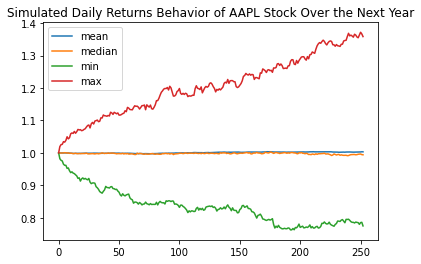

In [26]:
# Use the `plot` function to visually analyze the trajectory of AAPL stock daily returns on a 252 trading day simulation
df_simulated_returns.plot(title="Simulated Daily Returns Behavior of AAPL Stock Over the Next Year")

### Calculate the Simulated Profits/Losses of $10,000 Investment in `AAPL` Over the Next `252` Trading Days

In [27]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,9997.865801,9996.881904,9818.211872,10194.285813
2,9996.999015,9992.199639,9769.368384,10254.579564
3,9998.798234,9993.658280,9750.543917,10262.992458
4,9996.088652,9998.465378,9650.230327,10345.352735


### Plot the Simulated Profits/Losses of $10,000 Investment in `AAPL` Over the Next `252` Trading Days

<AxesSubplot:title={'center':'Simulated Outcomes Behavior of AAPL Stock Over the Next Year'}>

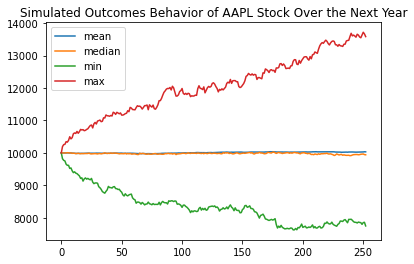

In [28]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl.plot(title="Simulated Outcomes Behavior of AAPL Stock Over the Next Year")

### Calculate the range of the possible outcomes of our $10,000 investments in `AAPL` stocks

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_AAPL.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.003171
std               0.097002
min               0.774678
25%               0.934802
50%               0.994070
75%               1.064228
max               1.358571
95% CI Lower      0.831956
95% CI Upper      1.200725
Name: 252, dtype: float64


In [30]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in AAPL stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $8319.56 and $12007.25.
